In [3]:
# Import pandas
import pandas as pd

# Read in the data file: df
df = pd.read_csv('Datasets/NOAA_QCLCD_2011_hourly_13904.txt', header=None)

# Print the output of df.head()
print(df.head(2))

      0         1    2   3       4  5      6  7  8  9   ... 34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00           ...        29.95      
1  13904  20110101  153  12  OVC049     10.00           ...        30.01      

   38 39 40 41     42 43  
0  AA           29.95     
1  AA           30.02     

[2 rows x 44 columns]


In [6]:
column_labels_list = ['Wban', 'date', 'Time', 'StationType', 'sky_condition', 'sky_conditionFlag', 'visibility', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_faren', 'dry_bulb_farenFlag', 'dry_bulb_cel', 'dry_bulb_celFlag', 'wet_bulb_faren', 'wet_bulb_farenFlag', 'wet_bulb_cel', 'wet_bulb_celFlag', 'dew_point_faren', 'dew_point_farenFlag', 'dew_point_cel', 'dew_point_celFlag', 'relative_humidity', 'relative_humidityFlag', 'wind_speed', 'wind_speedFlag', 'wind_direction', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressure', 'station_pressureFlag', 'pressure_tendency', 'pressure_tendencyFlag', 'presschange', 'presschangeFlag', 'sea_level_pressure', 'sea_level_pressureFlag', 'record_type', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'altimeterFlag', 'junk']
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag', 'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag', 'altimeter', 'record_type', 'altimeterFlag', 'junk']

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
print(df_dropped.head(2))

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   

  relative_humidity wind_speed wind_direction station_pressure  \
0                24         15            360            29.42   
1                23         10            340            29.49   

  sea_level_pressure  
0              29.95  
1              30.01  


In [13]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)
df_clean = df_clean.drop('date', axis=1)
df_clean = df_clean.drop('Time', axis=1)

# Print the output of df_clean.head()
print(df_clean.head(2))

                      Wban  StationType sky_condition visibility  \
2011-01-01 00:53:00  13904           12        OVC045      10.00   
2011-01-01 01:53:00  13904           12        OVC049      10.00   

                    dry_bulb_faren dry_bulb_cel wet_bulb_faren wet_bulb_cel  \
2011-01-01 00:53:00             51         10.6             38          3.1   
2011-01-01 01:53:00             51         10.6             37          3.0   

                    dew_point_faren dew_point_cel relative_humidity  \
2011-01-01 00:53:00              15          -9.4                24   
2011-01-01 01:53:00              14         -10.0                23   

                    wind_speed wind_direction station_pressure  \
2011-01-01 00:53:00         15            360            29.42   
2011-01-01 01:53:00         10            340            29.49   

                    sea_level_pressure  
2011-01-01 00:53:00              29.95  
2011-01-01 01:53:00              30.01  


In [14]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-6-20 08:00:00':'2011-6-20 09:00:00', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-06-20 08:00:00':'2011-06-20 09:00:00', 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'] , errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [15]:
# Print the median of the dry_bulb_faren column
print(df_clean.loc[:, 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


In [22]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean.loc[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head(2)

,Wban,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38


In [23]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean.loc[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').max()

# See the result
overcast_daily_max.head(2)

,Wban,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,12.0,OVC065,51.0,10.6,38,3.1,17.0,-9.4,27,15.0,360,29.51,30.03
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
difference = sunny_daily_max_mean - overcast_daily_max_mean
print(difference)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


                dry_bulb_faren
dry_bulb_faren             1.0


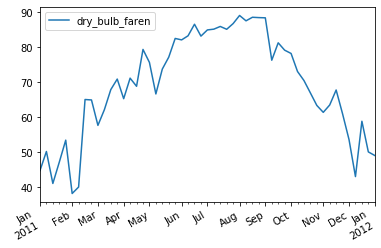

In [28]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean.loc[:,['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]


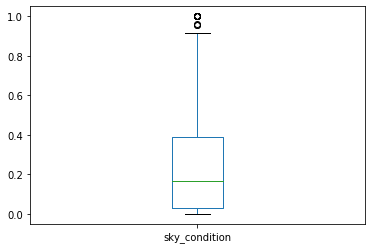

In [34]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition'] == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
print(resampled)

# Calculate the number of sunny hours per day
sunny_hours = resampled.sum()

# Calculate the number of measured hours per day
total_hours = resampled.count()

# Calculate the fraction of hours per day that were sunny
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

The weather in the dataset is typically sunny less than 40% of the time.

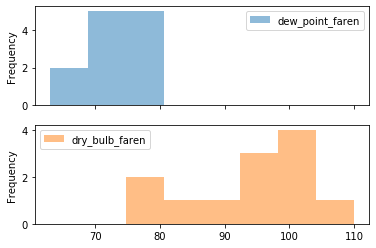

In [35]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()